In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def generate_query():
    return np.random.multivariate_normal(means, Cov, size=1) @ L

def distance_permutation(q, anchs):
    return np.argsort([np.linalg.norm(q-a) for a in anchs])


In [45]:
n = 1000
d = 32
D = 1024
means = 0.5 + 0.09*np.random.randn(d)
Cov = 0.01*np.eye(d)
data_low = np.random.multivariate_normal(means, Cov, size=n)
L = (np.random.randn(d, D)+1)/d
data_high = data_low @ L

piv = [16,32,48,64]
piv = [32]
anchor_idx = np.random.choice(n, size=piv[0])
anchors = np.array([data_high[i] for i in anchor_idx])
perms = np.zeros((n, piv[0]))
for i in range(n):
    perms[i] = np.argsort([np.linalg.norm(data_high[i]-a) for a in anchors])

query = generate_query()
dperm = distance_permutation(query, anchors)


In [46]:
sort_idx = np.argsort([np.linalg.norm(u-query) for u in data_high])
sort_perm_idx = np.argsort([np.linalg.norm(np.argsort(p)-np.argsort(dperm)) for p in perms])

# rho = np.arange(piv[0])
# dperm_inv = np.argsort(dperm)
# sort_perm_idx2 = np.argsort([np.linalg.norm(rho-p[dperm_inv]) for p in perms])

In [63]:
k = 10
found = np.zeros_like(sort_perm_idx)
for c, idx in enumerate(sort_perm_idx):
    if idx in sort_idx[:k]:
        found[c] = found[c-1] + 1
    else:
        found[c] = found[c-1]


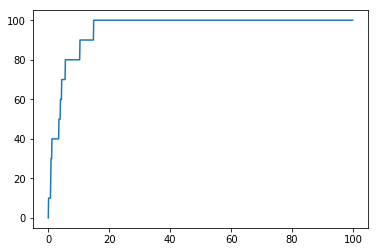

In [65]:
plt.plot(100*np.arange(n)/n, found/k*100)

In [66]:
dists1 = [np.linalg.norm(query - data_high[si]) for si in sort_idx[:100]]
dists2 = [np.linalg.norm(query - data_high[si]) for si in sort_perm_idx[:100]]

In [ ]:
plt.plot(dists1)
plt.plot(dists2)

In [38]:
dists1[0]

0.4949937511937503

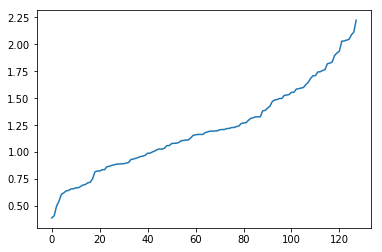

In [32]:
dists2 = [np.linalg.norm(query - anch) for anch in anchors[dperm]]
plt.plot(dists2)

In [39]:
dists2[0]

0.4949937511937503